In [ ]:
### EXPLORATION: 

# Time plots: cases over time (seasonal pattern? trend over years?)

### 1. TIME-BLIND MODEL:

# Time plots: visually investigate relationships with all variables) [blind to time-series]
# Create a time-series blind model (linear model, random forest?)

### 2. TIME-SERIES MODEL:

# Create time-series features (time shifts, rolling sum)
# Time-series model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline 

print("numpy", np.__version__)
print("pandas", pd.__version__)
print("matplotlib", matplotlib.__version__)
print("seaborn", sns.__version__)

numpy 1.13.1
pandas 0.20.3
matplotlib 2.0.2
seaborn 0.8.0


In [8]:
df_train = pd.read_csv('Data/dengue_features_train.csv')
df_test = pd.read_csv('Data/dengue_features_test.csv')
df_labels = pd.read_csv('Data/dengue_labels_train.csv')
df_result = pd.read_csv('Data/submission_format.csv')

In [14]:
def Col(df):
    for i in df.columns: 
        print(i)
        
Col(df_train)

city
year
weekofyear
week_start_date
ndvi_ne
ndvi_nw
ndvi_se
ndvi_sw
precipitation_amt_mm
reanalysis_air_temp_k
reanalysis_avg_temp_k
reanalysis_dew_point_temp_k
reanalysis_max_air_temp_k
reanalysis_min_air_temp_k
reanalysis_precip_amt_kg_per_m2
reanalysis_relative_humidity_percent
reanalysis_sat_precip_amt_mm
reanalysis_specific_humidity_g_per_kg
reanalysis_tdtr_k
station_avg_temp_c
station_diur_temp_rng_c
station_max_temp_c
station_min_temp_c
station_precip_mm


In [10]:
df_train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [121]:
df_labels.columns

Index(['total_cases'], dtype='object')

In [86]:
# Time plots:

if (len(df_labels.index.levels) < 3): 
    df_labels.set_index(['year', 'weekofyear'])

df_labels.head()
df_labels.unstack()

total_cases                                                         \
weekofyear          1      2     3     4     5     6     7     8     9     10   
city year                                                                       
iq   2000          NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     2001          0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
     2002          4.0   11.0  16.0  23.0  12.0  14.0  18.0   8.0   7.0  10.0   
     2003         10.0    5.0   6.0   2.0   1.0   2.0   2.0   3.0   5.0   1.0   
     2004          4.0    5.0   8.0   5.0   2.0   3.0   3.0   1.0   6.0   4.0   
     2005         10.0    5.0   8.0   7.0   8.0  11.0   6.0   7.0   7.0  14.0   
     2006         25.0   21.0  10.0  28.0  39.0  20.0  24.0  28.0  26.0   8.0   
     2007          0.0   14.0   6.0  10.0   5.0  12.0   9.0   5.0  11.0   2.0   
     2008         29.0   58.0  26.0  38.0  35.0  37.0  20.0  29.0  25.0  23.0   
     2009          1.0   10.0  11.0  29.0  35.0  30.0  20.0  21.0  12.0   9.0   
     2010         10.0    9.0  17.0  16.0  11.0  12.0  19.0  15.0  12.0  12.0   
sj   1990          NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
     1991         21.0   21.0  26.0  34.0  37.0  17.0  19.0  25.0  18.0  21.0   
     1992         81.0  104.0  90.0  85.0  55.0  53.0  65.0  33.0  38.0  59.0   
     1993         32.0   28.0  33.0  33.0  35.0  22.0  13.0  13.0  21.0  17.0   
     1994         31.0   26.0  35.0  36.0  39.0  25.0  31.0  37.0  33.0  25.0   
     1995         91.0   72.0  56.0  46.0  37.0  26.0  17.0  17.0  20.0  11.0   
     1996         23.0   14.0  20.0  13.0  23.0  20.0  16.0  16.0  23.0  14.0   
     1997         29.0   22.0  33.0  24.0  30.0  20.0  17.0  24.0  28.0  18.0   
     1998         64.0   68.0  49.0  50.0  56.0  75.0  63.0  62.0  41.0  50.0   
     1999         56.0   77.0  75.0  47.0  50.0  42.0  28.0  37.0  37.0  27.0   
     2000         16.0   23.0  18.0  18.0   9.0   7.0   7.0   4.0   3.0   2.0   
     2001         28.0   14.0  17.0  20.0  17.0  10.0  13.0  20.0   9.0  18.0   
     2002         37.0   38.0  34.0  26.0  19.0  18.0  22.0  16.0  18.0   6.0   
     2003         11.0    7.0   7.0  15.0   9.0   6.0   6.0   6.0   7.0  10.0   
     2004         15.0   20.0  14.0  10.0  21.0  14.0  14.0   9.0  11.0   5.0   
     2005         15.0   17.0   7.0   7.0   8.0   9.0  12.0  12.0   5.0   4.0   
     2006         10.0   17.0  19.0   9.0   9.0   9.0   3.0   7.0   7.0   0.0   
     2007         10.0    8.0  21.0  11.0   9.0  14.0  14.0  15.0  18.0  16.0   
     2008         15.0   14.0  15.0  10.0   9.0   2.0   6.0   8.0   5.0   1.0   

            ...                                                           \
weekofyear  ...      44     45     46     47     48     49     50     51   
city year   ...                                                            
iq   2000   ...     0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
     2001   ...     0.0    0.0    0.0    1.0    1.0    1.0    2.0    4.0   
     2002   ...    28.0   26.0   18.0   27.0   11.0   38.0   29.0   21.0   
     2003   ...     3.0    3.0    3.0    1.0    2.0    3.0    6.0    5.0   
     2004   ...     6.0   22.0   37.0   33.0   18.0   83.0  116.0   32.0   
     2005   ...     5.0    6.0   14.0    3.0    7.0   11.0    2.0    6.0   
     2006   ...     6.0    2.0   13.0   10.0    5.0    2.0    0.0    1.0   
     2007   ...    11.0   11.0    5.0    4.0    9.0   23.0   28.0   26.0   
     2008   ...    50.0   35.0   16.0   16.0   13.0    9.0   15.0    4.0   
     2009   ...     2.0    3.0    9.0    5.0    5.0    4.0    4.0    1.0   
     2010   ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
sj   1990   ...    57.0   71.0   44.0   56.0   53.0   52.0   47.0   26.0   
     1991   ...   140.0  140.0  127.0  129.0  169.0  141.0  108.0   78.0   
     1992   ...    57.0   44.0   34.0   47.0   60.0   60.0   53.0   36.0   
     1993   ...    43.0   46.0   31.0   25.0 

In [105]:
df_labels_flat = df_labels.reset_index()  ### TODO: use multi-level index to filter (instead of masking via flat df) 
df_labels_flat

mask_sj = (df_labels_flat['city'] == 'sj')
mask_year = df_labels_flat['year'] == 1999

df_sample = df_labels_flat[mask_sj & mask_year].iloc[1:]
df_sample

,city,year,weekofyear,total_cases
452,sj,1999,1,56
453,sj,1999,2,77
454,sj,1999,3,75
455,sj,1999,4,47
456,sj,1999,5,50
457,sj,1999,6,42
458,sj,1999,7,28
459,sj,1999,8,37
460,sj,1999,9,37
461,sj,1999,10,27


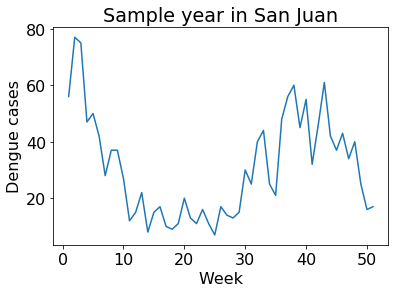

In [120]:
# Task 1.1: (df_sample): create sns/plt plot of total_cases over week_of_year 

# matplotlib:

matplotlib.rcParams.update({'font.size': 16})

plt.plot(df_sample['weekofyear'], df_sample['total_cases'])
plt.title('Sample year in San Juan')
plt.ylabel('Dengue cases')
plt.xlabel('Week')

(array([ 729755.,  729814.,  729875.,  729936.,  729998.,  730059.,  730120.]),
 <a list of 7 Text xticklabel objects>)

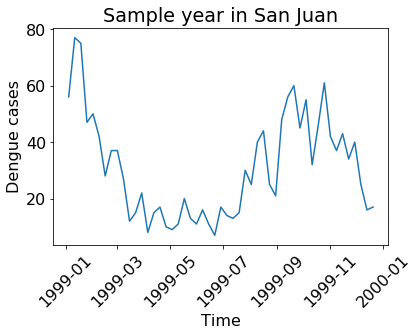

In [141]:
# Task 1.2: (df_sample): create datetime column & plot sns with datetime

pd.date_range(start = '1999-01-01',
             end = '1999-12-31', freq = 'W-MON')
df_sample['Monday'] = pd.date_range(start = '1999-01-01',
             end = '1999-12-31', freq = 'W-MON')[0:len(df_sample)]
df_sample

plt.plot(df_sample['Monday'], df_sample['total_cases'])
plt.title('Sample year in San Juan')
plt.ylabel('Dengue cases')
plt.xlabel('Time')
plt.xticks(rotation=45)

In [199]:
# Task 1.3: (df_labels): create datetime column over years, check validity

mask_sj = df_labels_flat['city'] == 'sj'
mask_iq = df_labels_flat['city'] == 'iq'

#df_labels_flat[mask_sj].iloc[0:50]

df_labels_flat[mask_sj] # Start: 1990 w18, end: 2008 w17
df_labels_flat[mask_iq] # Start: 2000 w26, end: 2010 w25

df_labels_flat['datetime'] = np.nan
df_labels_flat

# temporary sub-frames:
df_sj = df_labels_flat[mask_sj]
df_iq = df_labels_flat[mask_iq]

df_sj['datetime'] = pd.date_range(start = '1990-01-01',
                                  end = '2008-12-31', 
                                  freq = 'W-MON')[18:18+len(df_sj)]

df_iq['datetime'] = pd.date_range(start = '1990-01-01',
                                  end = '2008-12-31', 
                                  freq = 'W-MON')[26:26+len(df_iq)]

df_sj[df_sj['weekofyear'] == 1]  ### TODO Clean-up weird Mismatch! 
df_iq[df_iq['weekofyear'] == 1]  ### TODO Clean-up weird Mismatch! 

/Users/Lab/anaconda/envs/S2DS/lib/python3.5/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Lab/anaconda/envs/S2DS/lib/python3.5/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,city,year,weekofyear,total_cases,datetime
962,iq,2001,1,0,1990-12-31
1014,iq,2002,1,4,1991-12-30
1066,iq,2003,1,10,1992-12-28
1118,iq,2004,1,4,1993-12-27
1171,iq,2005,1,10,1995-01-02
1223,iq,2006,1,25,1996-01-01
1274,iq,2007,1,0,1996-12-23
1326,iq,2008,1,29,1997-12-22
1378,iq,2009,1,1,1998-12-21
1431,iq,2010,1,10,1999-12-27


(array([ 726833.,  727564.,  728294.,  729025.,  729755.,  730486.,
         731216.,  731947.,  732677.,  733408.]),
 <a list of 10 Text xticklabel objects>)

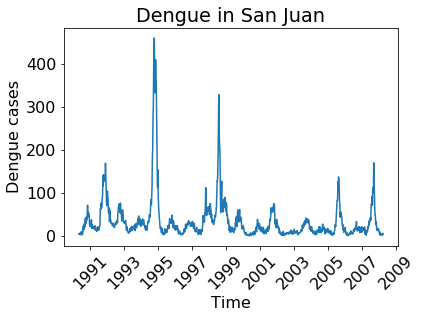

In [202]:
# Task 1.4: (df_labels): plot (sj / iq)

matplotlib.rcParams.update({'font.size': 16})

plt.plot(df_sj['datetime'], df_sj['total_cases'])
plt.title('Dengue in San Juan')
plt.ylabel('Dengue cases')
plt.xlabel('Time')
plt.xticks(rotation=45)

(array([ 726833.,  727198.,  727564.,  727929.,  728294.,  728659.,
         729025.,  729390.,  729755.,  730120.]),
 <a list of 10 Text xticklabel objects>)

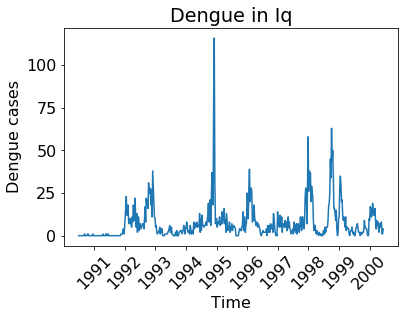

In [203]:
matplotlib.rcParams.update({'font.size': 16})

plt.plot(df_iq['datetime'], df_iq['total_cases'])
plt.title('Dengue in Iq')
plt.ylabel('Dengue cases')
plt.xlabel('Time')
plt.xticks(rotation=45)

### Exploration